In [75]:
# Clean for the right data
import pandas as pd

# Step 1: Create the League Standings Data
new_league_data = {
    "Pos": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    "Team": [
        "Atlético Madrid", "Real Madrid", "FC Barcelona", "Sevilla FC", "Real Sociedad",
        "Real Betis", "Villarreal CF", "RC Celta", "Granada CF", "Athletic Club",
        "CA Osasuna", "Cádiz CF", "Valencia CF", "Levante UD", "Getafe CF",
        "Deportivo Alavés", "Elche CF", "SD Huesca", "Real Valladolid", "SD Eibar"
    ],
    "Pld": [38] * 20,
    "W": [26, 25, 24, 24, 17, 17, 15, 14, 13, 11, 11, 11, 10, 9, 9, 9, 8, 7, 5, 6],
    "D": [8, 9, 7, 5, 11, 10, 13, 11, 7, 13, 11, 11, 13, 14, 11, 11, 12, 13, 16, 12],
    "L": [4, 4, 7, 9, 10, 11, 10, 13, 18, 14, 16, 16, 15, 15, 18, 18, 13, 18, 17, 20],
    "GF": [67, 67, 85, 53, 59, 50, 60, 55, 47, 46, 37, 36, 50, 46, 28, 36, 34, 34, 33, 29],
    "GA": [25, 28, 38, 33, 38, 50, 44, 57, 65, 42, 48, 58, 53, 57, 43, 57, 55, 53, 57, 52],
    "GD": [42, 39, 47, 20, 21, 0, 16, -2, -18, 4, -11, -22, -3, -11, -15, -21, -21, -19, -23, -23],
    "Pts": [86, 84, 79, 77, 62, 61, 58, 53, 46, 46, 44, 44, 43, 41, 38, 38, 36, 34, 31, 30]
}

# Convert the data to a pandas DataFrame
league_standings = pd.DataFrame(new_league_data)

# Step 2: Save the DataFrame to a CSV File
output_file_path = "final_new_league_standings.csv"
league_standings.to_csv(output_file_path, index=False)

# Step 3: Display the DataFrame and confirm the saved file
print("League Standings DataFrame:")
print(league_standings)

print(f"\nCSV file saved as '{output_file_path}'. You can find this file in your working directory.")


League Standings DataFrame:
    Pos              Team  Pld   W   D   L  GF  GA  GD  Pts
0     1   Atlético Madrid   38  26   8   4  67  25  42   86
1     2       Real Madrid   38  25   9   4  67  28  39   84
2     3      FC Barcelona   38  24   7   7  85  38  47   79
3     4        Sevilla FC   38  24   5   9  53  33  20   77
4     5     Real Sociedad   38  17  11  10  59  38  21   62
5     6        Real Betis   38  17  10  11  50  50   0   61
6     7     Villarreal CF   38  15  13  10  60  44  16   58
7     8          RC Celta   38  14  11  13  55  57  -2   53
8     9        Granada CF   38  13   7  18  47  65 -18   46
9    10     Athletic Club   38  11  13  14  46  42   4   46
10   11        CA Osasuna   38  11  11  16  37  48 -11   44
11   12          Cádiz CF   38  11  11  16  36  58 -22   44
12   13       Valencia CF   38  10  13  15  50  53  -3   43
13   14        Levante UD   38   9  14  15  46  57 -11   41
14   15         Getafe CF   38   9  11  18  28  43 -15   38
15   16  Dep

In [76]:
import pandas as pd
from fuzzywuzzy import process

# Load the datasets
laliga_stats_path = 'laliga_player_stats_english.csv'
standings_path = 'final_new_league_standings.csv'

laliga_stats = pd.read_csv(laliga_stats_path)
league_standings = pd.read_csv(standings_path)

# Display a sample of the datasets
print("La Liga Stats Sample:")
print(laliga_stats.head())

print("\nLeague Standings Sample:")
print(league_standings.head())


La Liga Stats Sample:
            Team    Position  Shirt number          Name  Minutes played  \
0  Athletic Club  Goalkeeper           NaN  Hodei Oleaga           0.000   
1  Athletic Club  Goalkeeper           1.0     A. Remiro           0.000   
2  Athletic Club  Goalkeeper          13.0      Herrerín           2.790   
3  Athletic Club  Goalkeeper          25.0    Unai Simón         630.000   
4  Athletic Club    Defender           3.0         Núñez           1.063   

   Games played Percentage of games played  Full games played  \
0             0                      0.00%                  0   
1             0                      0.00%                  0   
2            31                     82.00%                 31   
3             7                     18.00%                  7   
4            12                     32.00%                 11   

  Percentage of full games played  Games started  ... Corners  Tackles.1  \
0                           0.00%              0  ... 

In [77]:
import pandas as pd
from fuzzywuzzy import process

# File paths
laliga_stats_path = 'laliga_player_stats_english.csv'
standings_path = 'final_new_league_standings.csv'
output_file_path = 'laliga_player_stats_cleaned_with_ranking.csv'

# Load datasets
laliga_stats = pd.read_csv(laliga_stats_path)
league_standings = pd.read_csv(standings_path)

# Remove the "Shirt number" column
laliga_stats_cleaned = laliga_stats.drop(columns=['Shirt number'], errors='ignore')

# Remove duplicate rows based on 'Name' and 'Team'
laliga_stats_cleaned = laliga_stats_cleaned.drop_duplicates(subset=['Name', 'Team'], keep='first')

# Convert team names to strings and handle missing values
laliga_stats_cleaned['Team'] = laliga_stats_cleaned['Team'].astype(str).fillna("")
league_standings['Team'] = league_standings['Team'].astype(str).fillna("")

# Extract unique team names from both datasets
laliga_teams = laliga_stats_cleaned['Team'].unique()
standings_teams = league_standings['Team'].unique()

# Perform fuzzy matching to map team names
team_mapping = {}
for team in standings_teams:
    closest_match = process.extractOne(team, laliga_teams)
    if closest_match:  # Ensure a match was found
        team_mapping[team] = closest_match[0]

# Display the team name mappings
print("\nTeam Name Mappings:")
for standings_team, matched_team in team_mapping.items():
    print(f"{standings_team} -> {matched_team}")

# Replace the team names in the standings dataset with the matched names
league_standings['Team'] = league_standings['Team'].map(team_mapping)

# Merge the ranking (Pos) column from standings into the cleaned La Liga player stats dataset
laliga_stats_with_ranking = pd.merge(
    league_standings[['Pos', 'Team']],  # 'Pos' first for the left-hand side merge
    laliga_stats_cleaned,
    on='Team',
    how='left'
)

# Save the updated dataset to a new file
laliga_stats_with_ranking.to_csv(output_file_path, index=False)

# Display a sample of the cleaned and updated dataset
print("\nCleaned and Updated Dataset with Rankings:")
print(laliga_stats_with_ranking.head())

print(f"\nThe updated file has been saved as: {output_file_path}")



Team Name Mappings:
Atlético Madrid -> Atlético de Madrid
Real Madrid -> Real Madrid
FC Barcelona -> FC Barcelona
Sevilla FC -> Sevilla FC
Real Sociedad -> Real Sociedad
Real Betis -> Real Betis
Villarreal CF -> Villarreal CF
RC Celta -> RC Celta
Granada CF -> R. Valladolid CF
Athletic Club -> Athletic Club
CA Osasuna -> Girona FC
Cádiz CF -> R. Valladolid CF
Valencia CF -> Valencia CF
Levante UD -> Levante UD
Getafe CF -> Getafe CF
Deportivo Alavés -> D. Alavés
Elche CF -> R. Valladolid CF
SD Huesca -> SD Huesca
Real Valladolid -> Real Betis
SD Eibar -> SD Eibar

Cleaned and Updated Dataset with Rankings:
   Pos                Team    Position             Name  Minutes played  \
0    1  Atlético de Madrid  Goalkeeper  Alex Dos Santos           0.000   
1    1  Atlético de Madrid  Goalkeeper             Adán          90.000   
2    1  Atlético de Madrid  Goalkeeper           Oblak            3.330   
3    1  Atlético de Madrid    Defender            Godín           2.507   
4    1  At

In [111]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from collections import Counter
from math import log2
import random

# Load the dataset
file_path = 'laliga_player_stats_cleaned_with_ranking.csv'
data = pd.read_csv(file_path)

# Display the dataset
print("Dataset Loaded:")
print(data.head())


Dataset Loaded:
   Pos                Team    Position             Name  Minutes played  \
0    1  Atlético de Madrid  Goalkeeper  Alex Dos Santos           0.000   
1    1  Atlético de Madrid  Goalkeeper             Adán          90.000   
2    1  Atlético de Madrid  Goalkeeper           Oblak            3.330   
3    1  Atlético de Madrid    Defender            Godín           2.507   
4    1  Atlético de Madrid    Defender      Filipe Luis           2.037   

   Games played Percentage of games played  Full games played  \
0             0                      0.00%                  0   
1             1                      3.00%                  1   
2            37                     97.00%                 37   
3            30                     79.00%                 27   
4            27                     71.00%                 15   

  Percentage of full games played  Games started  ... Corners  Tackles.1  \
0                           0.00%              0  ...       0     

In [112]:
# Aggregate the dataset by teams
team_data = data.groupby('Team').agg({
    'Minutes played': 'sum',
    'Goals scored': 'sum',
    'Assists': 'sum',
    'Shots on target': 'sum',
    'Pos': 'first'  # 'Pos' is the final team ranking
}).reset_index()

# Define features and target
features = ['Minutes played', 'Goals scored', 'Assists', 'Shots on target']
target = 'Pos'
X = team_data[features]
y = team_data[target]

# Display class distribution
print("\nClass Distribution Before Fixing:")
print(y.value_counts())



Class Distribution Before Fixing:
Pos
10    1
6     1
13    1
4     1
18    1
20    1
5     1
2     1
8     1
1     1
9     1
14    1
11    1
15    1
3     1
16    1
7     1
Name: count, dtype: int64


In [105]:
# Combine rare classes or drop them (if necessary)
rare_classes = y.value_counts()[y.value_counts() < 2].index
team_data['Pos'] = team_data['Pos'].apply(lambda x: x if x not in rare_classes else None)

# Drop rows with None in the target
team_data = team_data.dropna(subset=['Pos'])

# Update features and target after fixing rare classes
X = team_data[features]
y = team_data['Pos']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Display class distribution after fixing
print("\nClass Distribution After Fixing:")
print(y.value_counts())


ValueError: Found array with 0 sample(s) (shape=(0, 4)) while a minimum of 1 is required by StandardScaler.

/Users/billbao/Dropbox/Mac/Documents/2024 Fall/322/finalProject/.venv/lib/python3.13/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/billbao/Dropbox/Mac/Documents/2024 Fall/322/finalProject/.venv/lib/python3.13/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/billbao/Dropbox/Mac/Documents/2024 Fall/322/finalProject/.venv/lib/python3.13/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/billbao/Dropbox/Mac/Documents/2024 Fall/322/finalProject/.venv/lib/python3.13/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/billbao/Dropbox/Mac/Documents/2024 Fall/322/finalProject/

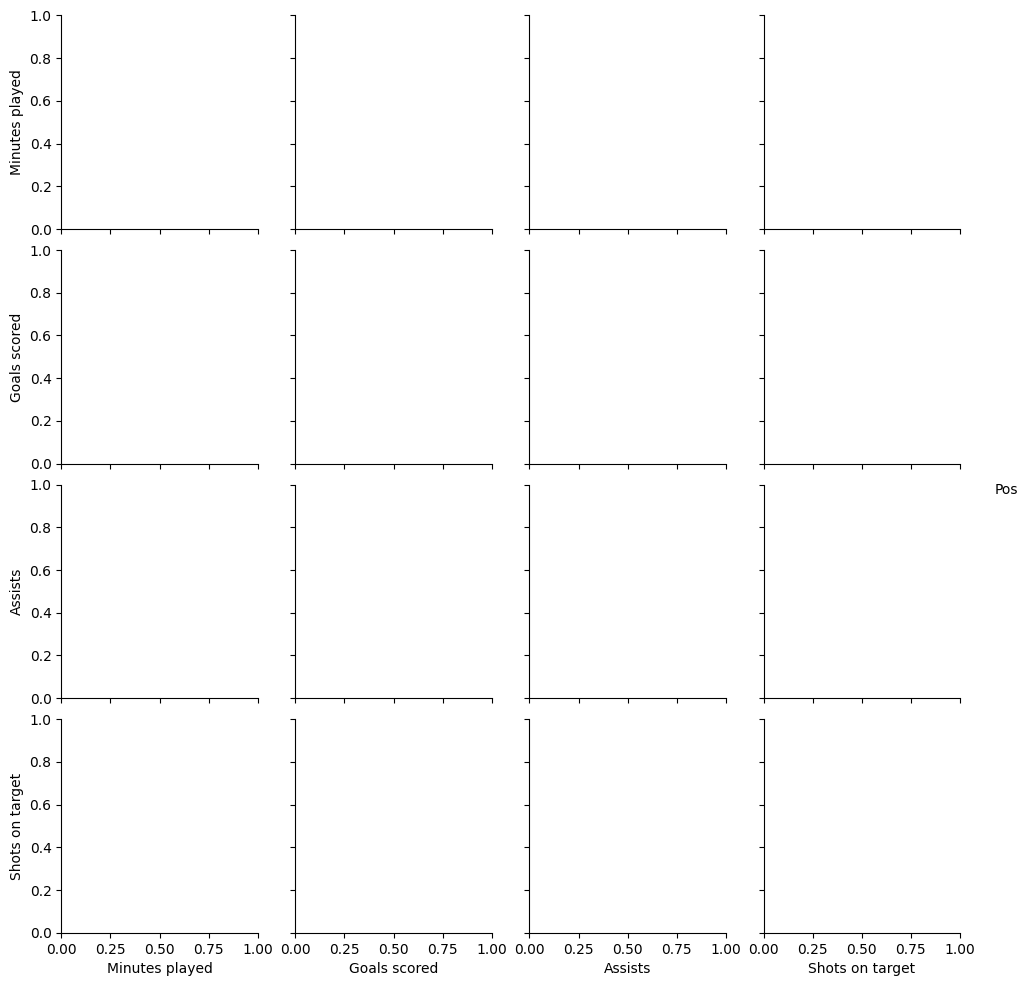

/Users/billbao/Dropbox/Mac/Documents/2024 Fall/322/finalProject/.venv/lib/python3.13/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/Users/billbao/Dropbox/Mac/Documents/2024 Fall/322/finalProject/.venv/lib/python3.13/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


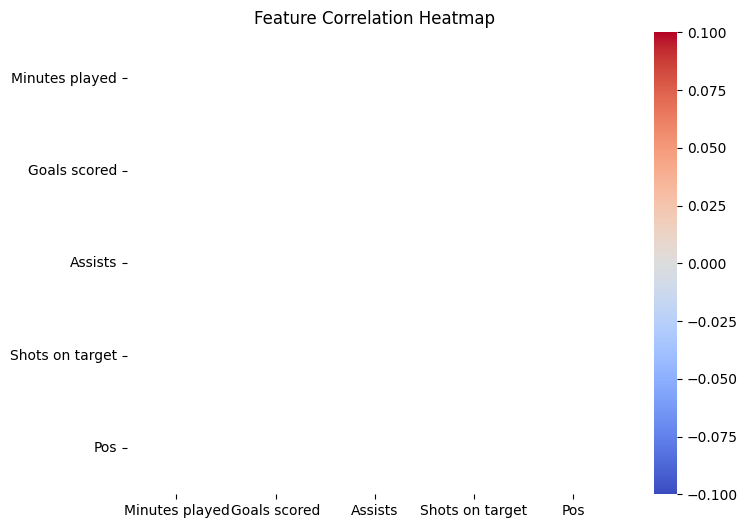

In [106]:
# Pairplot for features
sns.pairplot(team_data, vars=features, hue='Pos', palette='viridis')
plt.show()

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(team_data[features + [target]].corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


In [107]:
class MyRandomForestClassifier:
    def __init__(self, n_trees=20, max_features=2, top_trees=7):
        self.n_trees = n_trees
        self.max_features = max_features
        self.top_trees = top_trees
        self.trees = []

    def entropy(self, y):
        counts = Counter(y)
        total = len(y)
        return -sum((count / total) * log2(count / total) for count in counts.values() if count > 0)

    def fit(self, X, y):
        self.trees = []
        for _ in range(self.n_trees):
            indices = np.random.choice(len(X), len(X), replace=True)
            X_boot = X[indices]
            y_boot = y.iloc[indices]  # Fixed to use pandas indexing
            selected_features = random.sample(range(X.shape[1]), self.max_features)
            tree = DecisionTreeClassifier(random_state=42, max_features=self.max_features)
            tree.fit(X_boot[:, selected_features], y_boot)
            self.trees.append((tree, selected_features))

    def predict(self, X):
        predictions = np.zeros((len(X), len(self.trees)))
        for i, (tree, features) in enumerate(self.trees):
            predictions[:, i] = tree.predict(X[:, features])
        return [Counter(row).most_common(1)[0][0] for row in predictions]


In [108]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


ValueError: Found input variables with inconsistent numbers of samples: [17, 0]


Custom Random Forest - Classification Report:
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00       1.0
         2.0       0.00      0.00      0.00       0.0
         4.0       0.00      0.00      0.00       1.0
         5.0       0.00      0.00      0.00       1.0
         8.0       0.00      0.00      0.00       0.0
        10.0       0.00      0.00      0.00       1.0
        11.0       0.00      0.00      0.00       1.0
        13.0       0.00      0.00      0.00       1.0
        16.0       0.00      0.00      0.00       0.0
        18.0       0.00      0.00      0.00       0.0

    accuracy                           0.00       6.0
   macro avg       0.00      0.00      0.00       6.0
weighted avg       0.00      0.00      0.00       6.0



/Users/billbao/Dropbox/Mac/Documents/2024 Fall/322/finalProject/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/billbao/Dropbox/Mac/Documents/2024 Fall/322/finalProject/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/billbao/Dropbox/Mac/Documents/2024 Fall/322/finalProject/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero

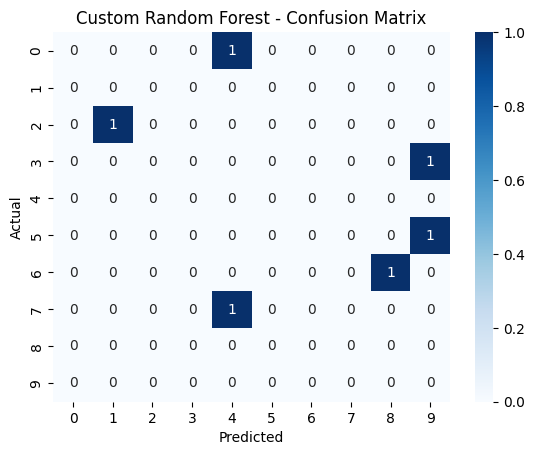

In [109]:
# Train the custom random forest
custom_rf = MyRandomForestClassifier(n_trees=20, max_features=2, top_trees=7)
custom_rf.fit(X_train, y_train)

# Predict and evaluate
y_pred_custom_rf = custom_rf.predict(X_test)
print("\nCustom Random Forest - Classification Report:")
print(classification_report(y_test, y_pred_custom_rf))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_custom_rf), annot=True, fmt='d', cmap='Blues')
plt.title("Custom Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



KNN - Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       1.0
           2       0.00      0.00      0.00       0.0
           4       0.00      0.00      0.00       1.0
           5       0.00      0.00      0.00       1.0
           7       0.00      0.00      0.00       0.0
          10       0.00      0.00      0.00       1.0
          11       0.00      0.00      0.00       1.0
          13       0.00      0.00      0.00       1.0

    accuracy                           0.00       6.0
   macro avg       0.00      0.00      0.00       6.0
weighted avg       0.00      0.00      0.00       6.0



/Users/billbao/Dropbox/Mac/Documents/2024 Fall/322/finalProject/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/billbao/Dropbox/Mac/Documents/2024 Fall/322/finalProject/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/billbao/Dropbox/Mac/Documents/2024 Fall/322/finalProject/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero

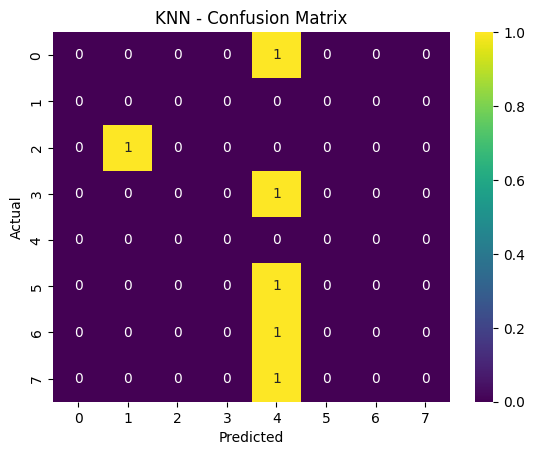


Decision Tree - Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       1.0
           2       0.00      0.00      0.00       0.0
           4       0.00      0.00      0.00       1.0
           5       0.00      0.00      0.00       1.0
          10       0.00      0.00      0.00       1.0
          11       0.00      0.00      0.00       1.0
          13       0.00      0.00      0.00       1.0
          18       0.00      0.00      0.00       0.0
          20       0.00      0.00      0.00       0.0

    accuracy                           0.00       6.0
   macro avg       0.00      0.00      0.00       6.0
weighted avg       0.00      0.00      0.00       6.0



/Users/billbao/Dropbox/Mac/Documents/2024 Fall/322/finalProject/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/billbao/Dropbox/Mac/Documents/2024 Fall/322/finalProject/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/billbao/Dropbox/Mac/Documents/2024 Fall/322/finalProject/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero

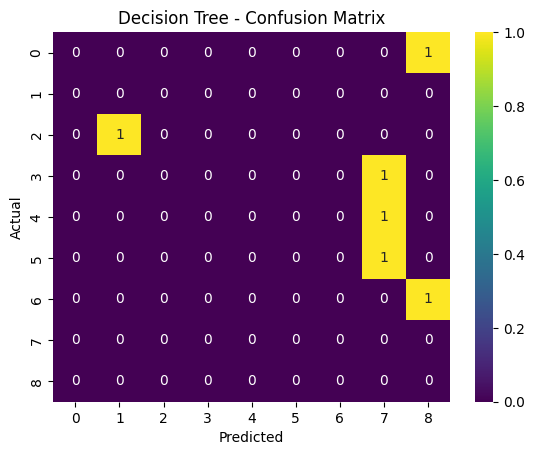


Random Forest - Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       1.0
           2       0.00      0.00      0.00       0.0
           4       0.00      0.00      0.00       1.0
           5       0.00      0.00      0.00       1.0
           7       0.00      0.00      0.00       0.0
          10       0.00      0.00      0.00       1.0
          11       0.00      0.00      0.00       1.0
          13       0.00      0.00      0.00       1.0
          16       0.00      0.00      0.00       0.0
          18       0.00      0.00      0.00       0.0
          20       0.00      0.00      0.00       0.0

    accuracy                           0.00       6.0
   macro avg       0.00      0.00      0.00       6.0
weighted avg       0.00      0.00      0.00       6.0



/Users/billbao/Dropbox/Mac/Documents/2024 Fall/322/finalProject/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/billbao/Dropbox/Mac/Documents/2024 Fall/322/finalProject/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/billbao/Dropbox/Mac/Documents/2024 Fall/322/finalProject/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero

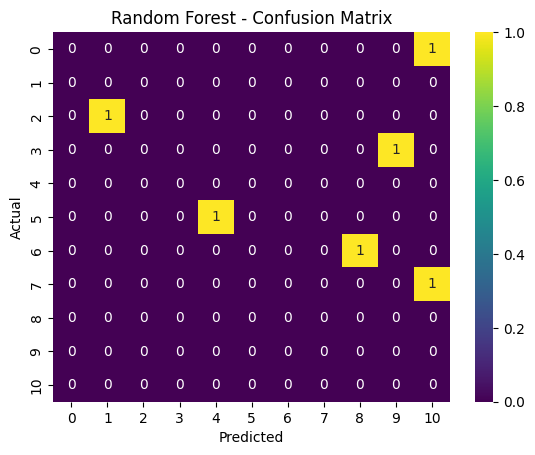


Naive Bayes - Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       1.0
           2       0.00      0.00      0.00       0.0
           4       0.00      0.00      0.00       1.0
           5       0.00      0.00      0.00       1.0
          10       0.00      0.00      0.00       1.0
          11       0.00      0.00      0.00       1.0
          13       0.00      0.00      0.00       1.0
          14       0.00      0.00      0.00       0.0
          18       0.00      0.00      0.00       0.0

    accuracy                           0.00       6.0
   macro avg       0.00      0.00      0.00       6.0
weighted avg       0.00      0.00      0.00       6.0



/Users/billbao/Dropbox/Mac/Documents/2024 Fall/322/finalProject/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/billbao/Dropbox/Mac/Documents/2024 Fall/322/finalProject/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/billbao/Dropbox/Mac/Documents/2024 Fall/322/finalProject/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero

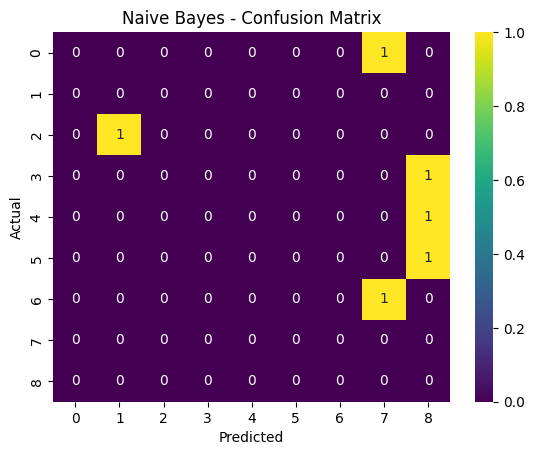

In [110]:
# Define models
models = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Naive Bayes": GaussianNB()
}

# Evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name} - Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='viridis')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
